In [2]:
import pandas as pd
import numpy as np

# Para reprodutibilidade
np.random.seed(42)

# Número de registros
n = 1000

# Gerar dados fictícios
df = pd.DataFrame({
    'idade': np.random.randint(18, 70, size=n),
    'tempo_como_cliente': np.random.randint(1, 72, size=n),  # em meses
    'mensalidade': np.round(np.random.normal(100, 30, size=n), 2),
    'possui_servico_extra': np.random.choice(['sim', 'nao'], size=n),
    'tipo_contrato': np.random.choice(['mensal', 'anual', '2_anos'], size=n, p=[0.6, 0.3, 0.1]),
    'forma_pagamento': np.random.choice(['cartao', 'boleto', 'debito_automatico'], size=n),
    'suporte_tecnico': np.random.choice(['sim', 'nao'], size=n),
})

# Gerar o churn com alguma lógica: clientes com contrato mensal e sem serviços extras têm mais chance de sair
df['churn'] = np.where(
    (df['tipo_contrato'] == 'mensal') &
    (df['possui_servico_extra'] == 'nao') &
    (df['tempo_como_cliente'] < 12),
    1,  # saiu
    np.random.choice([0, 1], size=n, p=[0.8, 0.2])  # probabilidade geral
)

df.head()


,idade,tempo_como_cliente,mensalidade,possui_servico_extra,tipo_contrato,forma_pagamento,suporte_tecnico,churn
0,56,15,77.38,sim,mensal,debito_automatico,nao,1
1,69,64,91.58,nao,mensal,boleto,nao,0
2,46,28,49.21,sim,mensal,cartao,nao,0
3,32,39,97.05,nao,mensal,debito_automatico,nao,0
4,60,57,70.34,nao,anual,boleto,sim,0


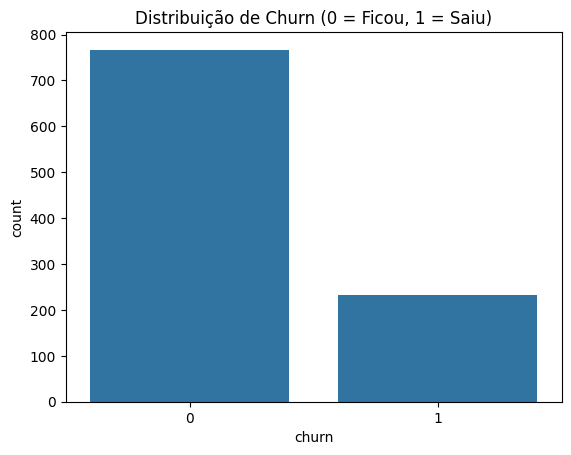

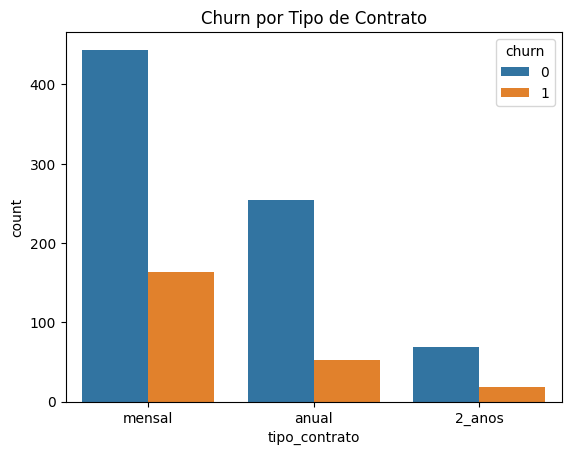

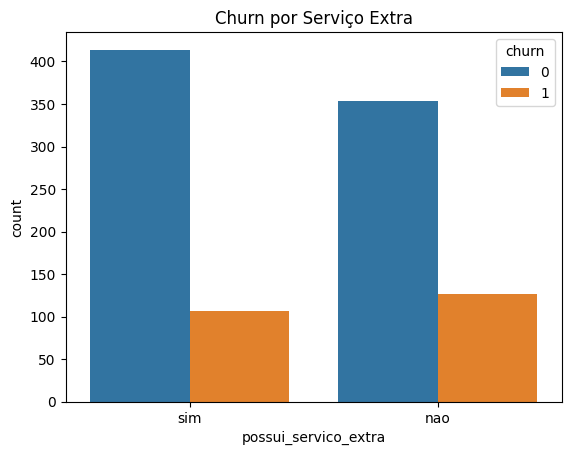

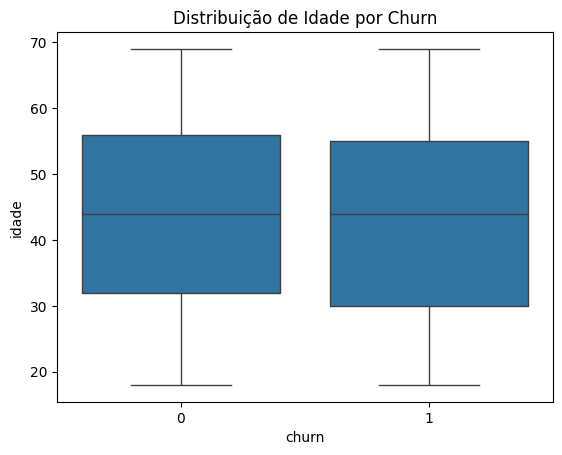

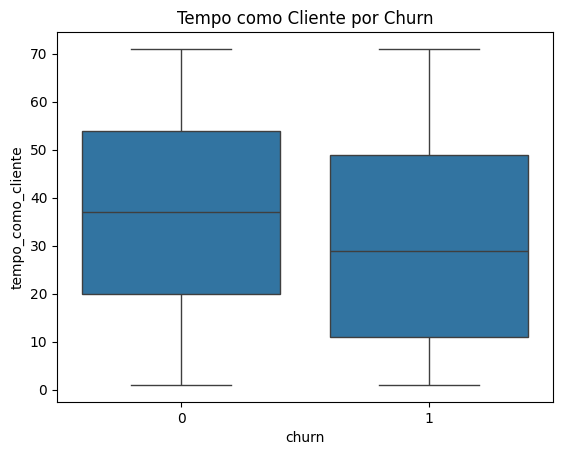

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribuição geral de churn
sns.countplot(x='churn', data=df)
plt.title("Distribuição de Churn (0 = Ficou, 1 = Saiu)")
plt.show()

# Comparar tipo de contrato com churn
sns.countplot(x='tipo_contrato', hue='churn', data=df)
plt.title("Churn por Tipo de Contrato")
plt.show()

# Comparar serviço extra com churn
sns.countplot(x='possui_servico_extra', hue='churn', data=df)
plt.title("Churn por Serviço Extra")
plt.show()

# Boxplot de idade vs churn
sns.boxplot(x='churn', y='idade', data=df)
plt.title("Distribuição de Idade por Churn")
plt.show()

# Boxplot de tempo como cliente
sns.boxplot(x='churn', y='tempo_como_cliente', data=df)
plt.title("Tempo como Cliente por Churn")
plt.show()


In [4]:
# Cópia do dataset
df_modelo = df.copy()

# Codificar variáveis categóricas (exceto 'churn')
df_modelo = pd.get_dummies(df_modelo, drop_first=True)

df_modelo.head()


,idade,tempo_como_cliente,mensalidade,churn,possui_servico_extra_sim,tipo_contrato_anual,tipo_contrato_mensal,forma_pagamento_cartao,forma_pagamento_debito_automatico,suporte_tecnico_sim
0,56,15,77.38,1,True,False,True,False,True,False
1,69,64,91.58,0,False,False,True,False,False,False
2,46,28,49.21,0,True,False,True,True,False,False
3,32,39,97.05,0,False,False,True,False,True,False
4,60,57,70.34,0,False,True,False,False,False,True


In [5]:
from sklearn.model_selection import train_test_split

# Separar X (features) e y (alvo)
X = df_modelo.drop('churn', axis=1)
y = df_modelo['churn']

# Divisão treino/teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.80      0.97      0.87       153
           1       0.64      0.19      0.30        47

    accuracy                           0.79       200
   macro avg       0.72      0.58      0.58       200
weighted avg       0.76      0.79      0.74       200



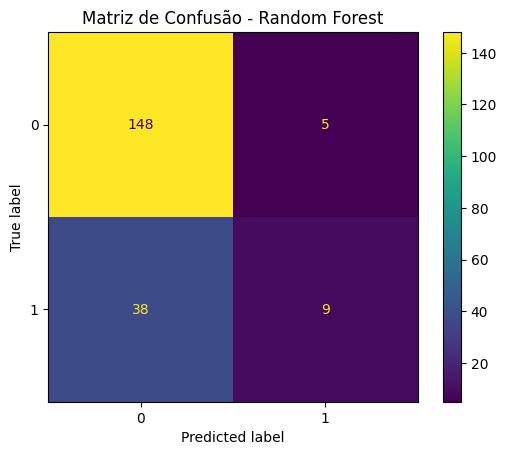

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Modelo
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Previsão
y_pred = rf.predict(X_test)

# Avaliação
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred))

# Matriz de confusão
ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test)
plt.title("Matriz de Confusão - Random Forest")
plt.show()
